# **Lição 2: Convolutional Neural Networks (CNNs)**

# 1. Introdução<a class="anchor" name="section_1"></a>

### 1.1 Índice <a class="anchor" name="section_1.1"></a>

* [1. Introdução](#section_1)
    * [1.1 Índice](#section_1.1)
    * [1.2 Como funcionam as CNNs](#section_1.2)
      * [1.2.1 Camada de convolução (Convolutional Layer)](#section_1.2.1)
      * [1.2.2 Camade de Pooling (Pooling Layer)](#section_1.2.2)
      * [1.2.3 Camada Totalmente Conectada (Fully Connected Layer)](#section_1.2.3)

* [2. Aprofundamento no processo de aprendizado](#section_2)
    * [2.1 Parâmetros e hiperparâmetros](#section_2.1)
    * [2.2 Overfitting](#section_2.2)
    * [2.3 Separação o Dataset](#section_2.3)
    * [2.4 Importando o Dataset](#section_2.4)

* [3. Funções de ativação](#section_3)
    * [3.1 Funções de ativação para hidden layers](#section_3.1)
      * [3.1.1 Função sigmoide para hidden layers](#section_3.1.1)
      * [3.1.2 Função tanh para hidden layers](#section_3.1.2)
      * [3.1.3 Limitações das funções sigmoide e tanh](#section_3.1.3)
      * [3.1.4 Função de ativação linear retificada (ReLU) para hidden layers](#section_3.1.4)
    * [3.2 Dicas para a utilização da ReLU em CNNs](#section_3.2)
      * [3.2.1 Use a ReLU como a função de ativação padrão](#section_3.2.1)
      * [3.2.2 Teste um valor baixo para o viés (bias) no input](#section_3.2.2)
      * [3.2.3 Use a inicialização de pesos *He initialization](#section_3.2.3)
      * [3.2.4 Escale os dados de input](#section_3.2.4)
      * [3.2.5 Use penalidade de pesos](#section_3.2.5)
    * [3.3 Extensões e alternativas ao ReLU](#section_3.3)
      * [3.3.1 Dying ReLU](#section_3.3.1)
      * [3.3.2 Leaky ReLU](#section_3.3.2)
      * [3.3.3 ELU](#section_3.3.3)
    * [3.4 Ativação da camada de output](#section_3.4)
      * [3.4.1 Função softmax](#section_3.4.1)

* [4. Transfer Learning](#section_4)
  * [4.1 introdução](#section_4.1)
  * [4.2 Transfer Learning para reconhecimento de imagens](#section_4.2)
  * [4.3 Como usar modelos pré-treinados](#section_4.3)

* [5. Problema prático](#section_5)
    
* [6. Sugestões](#section_6)

* [7. Referências Bibliográficas](#section_7)

#**1.2 Como funcionam as CNNs**<a class="anchor" name="section_1.2"></a>

CNN é um modelo de rede neural que tem por objetivo detectar padrões, o que permite extrair características essenciais da entrada, de forma a classificá-la como um todo. Os elementos de sua arquitetura são explicados a seguir: 

###**1.2.1 Camada de Convolução (Convolutional Layer)**<a class="anchor" name="section_1.2.1"></a>

A enfatização de características se baseia no processo de convolução, como é mostrado no GIF a seguir:


![convolution.gif](https://aigeekprogrammer.com/wp-content/uploads/2019/12/CNN-filter-animation-1.gif)

 A partir de uma entrada, por exemplo uma imagem, são atribuídos diferentes pesos, em forma de matriz como mostrado acima, para cada aspecto da mesma, a fim de diferenciar cada um. São denominados "Kernels". As convoluções destes com a entrada geram filtros que permitem a extração das características para o reconhecimento da mesma.

 O número dessas camadas varia de acordo com a aplicação, possibilitando a identificação de padrões cada vez mais específicos e complexos.


###**1.2.2 Camada de Pooling (Pooling Layer)**<a class="anchor" name="section_1.2.2"></a>

Extraem as características mais dominantes da saída da camada de convolução. O objetivo desta camada é o de diminuir o esforço computacional necessário para processar a entrada reduzindo os espaços de memória que as saídas da camada de convolução ocupam. Isto é feito através de duas principais formas: Substituindo essa saída, que é composta de vários valores para a mesma característica (representa a intensidade da característica naquele ponto), pelo maior valor entre elas (chamado de “Max Pooling”) ou pelo valor médio entre elas (chamado de “Average Pooling”).

![input.gif](https://ichi.pro/assets/images/max/724/1*KQIEqhxzICU7thjaQBfPBQ.png)

###**1.2.3 Camada Totalmente Conectada (Fully Connected Layer)**<a class="anchor" name="section_1.2.3"></a>

Após passar pelas camadas acima, lembrando que podem ter várias de cada, sempre passando primeiro pela “Convolutional Layer” e depois pela “Pooling Layer”, depois para o próximo par de camadas, o próximo estágio é planificar a saída final dessas camadas para passar pela Camada Totalmente Conectada, que por sua vez aplica algoritmos de feedforward e backpropagation para: 
 - Na fase de treinamento: Estabelecer quais características mais se correlacionam com a classe do objeto;  
 - Na aplicação: Comparar as características encontradas com as classes já conhecidas e decidir a qual classe a entrada inicial pertence. 

Uma visão geral da organização e do funcionamento de uma CNN se encontra na imagem a seguir:

 ![cnn.png](https://blog.kakaocdn.net/dn/cj56rk/btqHjqbQhq3/yTlqhHrblOESyQG6FubhIK/img.png)

##**2. Aprofundamento no processo de aprendizado** <a class="anchor" name="section_2"></a>

###**2.1 Parâmetros e Hiperparâmetros** <a class="anchor" name="section_2.1"></a>

Com a seleção da arquitetura da rede, e observando o seu funcionamento, o próximo passo é melhorar o seu desempenho. Para isso, é necessário verificar alguns aspectos das redes. É possível fazer a distinção entre dois tipos de parâmetros, os chamados de parâmetros do modelo e hiperparâmetros. Os parâmetros são estimados pelo modelo a partir do dataset que lhe é fornecido. Os hiperparâmetros não são estimados pelo modelo. O objetivo dos hiperparâmetros é estimar os parâmetros do modelo, por exemplo os pesos da rede neural. A partir disso é possível compreender que na medida em que esses parâmetros são ajustados, ocorre um treinamento melhor da rede, proporcionando dessa forma resultados melhores. Alguns exemplos dos hiperparâmetros são: learning rate, o número de épocas, batch size.

Para realizar os ajustes dos hiperparâmetros é possível fazer manualmente, isto é, realizar diversos testes sobre as diferentes combinações de hiperparâmetros. Dessa maneira, um simples algoritmo pode ser feito para realizar testes com cada combinação e salvar as configurações que demonstrassem um melhor resultado. No entanto, esse processo pode ser longo e exaustivo. Uma outra forma de buscar a otimização dos hiperparâmetros é através do uso de bibliotecas. FastAI é uma biblioteca que possibilita o ajuste dos hiperparâmetros. Dentro da otimização de parâmetros há uma área conhecida como AutoML. Nessa área são estudadas formas de aplicar o Machine Learning para buscar combinações dos hiperparâmetros que consigam ajudar no desempenho da rede. Para encontrar mais informações sobre o tópico é possível consultar [aqui](https://insaid.medium.com/automated-hyperparameter-tuning-988b5aeb7f2a).



###**2.2 Overfitting** <a class="anchor" name="section_2.2"></a>

Um outro ponto bastante importante para o aprendizado das redes faz referência ao uso de uma técnica de separação dos datasets. Ao treinar os modelos sabemos que utilizamos um dataset com suas labels para ensinar ao modelo como fazer a classificação. No entanto, é necessário compreender que ao utilizar um mesmo dataset para treinar o seu modelo e avaliá-lo pode ser perigoso. Isso se deve ao fato de que com essa estratégia o modelo pode acabar caindo em um caso de overfitting.

O overfitting acontece quando o modelo treinado começa a memorizar os dados que estão sendo usados para treiná-lo. Com o overfitting a acurácia do seu modelo para o dataset em questão será extremamente alta. No entanto, a acurácia mostrada estará mascarando o que de fato está acontecendo. Quando overfitting ocorre, o seu modelo começa a memorizar as labels do seu dataset ao invés de realmente realizar a sua classificação. Isso é ruim, tendo em vista que o objetivo do modelo é conseguir fazer predições de forma genérica e não para o dataset em questão. Uma forma de verificar o baixo desempenho da rede que tem problemas de overfitting é introduzir um dataset que nunca foi visto pela rede.Com isso, a rede não conseguirá fazer a classificação adequada para esse dataset, porque ela apenas memorizou o dataset em que foi treinada e não aprendeu, de fato, a realizar predições genéricas.

![overfitting](https://miro.medium.com/max/700/1*Rhc8L0_Nuw374xMb05UnzA.png)

A imagem apresenta diferentes casos para observar se está ou não acontecendo o overfitting. O comportamento ideal para a função de loss é que ela sempre diminua, mas com a separação do dataset é possível observar se a rede está apenas memorizando. Quando a função de custo do dataset de validação passa a crescer enquanto a loss do dataset de treinamento está decaindo, fica evidente o overfitting.

###**2.3 Separação do dataset** <a class="anchor" name="section_2.3"></a>

Uma técnica utilizada para evitar o overfitting das redes neurais é utilizar uma separação de datasets. Dessa forma é possível analisar melhor o comportamento da rede a ser treinada. Usualmente o dataset é divido em duas ou três partes (treinamento, teste e validação).


*   **Dataset de Treinamento**

  O dataset de treinamento é composto pela maior parte do dataset original (60%-80%). Essa divisão depende do tamanho do seu dataset original. É com esse dataset que o seu modelo será treinado, por isso a maior parte do dataset original fica contida nesse dataset.

*   **Dataset de Teste**

  O dataset de teste é composto por uma parcela menor do dataset original (10%-20%). Essa divisão pode ser feita pensando se serão utilizadas três ou duas divisões do dataset original. Para o caso em que o dataset contém apenas duas divisões (dataset de treinamento e de teste), o dataset corresponde ao restante do dataset original. Caso o dataset seja dividido em três partes, usualmente a parte restante do dataset é dividida igualmente entre os datasets de teste e validação. É com o dataset de teste que o será verificado se o seu modelo não está apresentando overfitting. 

*   **Dataset de Validação**

  O dataset de validação é utilizado como uma outra forma de verificar o overfitting do modelo. Esse dataset nunca é visto pelo modelo, apenas no momento final de sua validação.

Com a separação dos datasets o processo de treinamento ocorre da seguinte forma:


1.   Primeiro a rede é treinada com o dataset de treinamento. Assim em uma época é possível observar a curva característica da loss em função das épocas. Com o passar das épocas espera-se que a loss caia.
2.   O decrescimento da loss é um bom sinal. No entanto, deve ser avaliada a possibilidade de overfitting. Para isso, o dataset de teste pode ser utilizado para observar a curva de loss em função das épocas.
3.   Caso a curva do dataset de treinamento esteja decrescendo bem como a curva do dataset de teste, não está acontecendo overfitting. Isso mostra que a rede está sendo capaz de classificar de forma genérica, tendo em vista que ela foi treinada com um dataset (treinamento), mas está conseguindo classificar corretamente um dataset em que não foi treinada (teste).
4.   Em contrapartida, no caso em que a loss do dataset de treinamento está caindo, mas a loss do dataset de teste não está caindo, está acontecendo overfitting. Isso significa que a rede consegue classificar bem seu dataset de treinamento, mas não consegue classificar corretamente um dataset desconhecido. Em outras palavras, a sua rede está memorizando o dataset em que está sendo treinada e não aprendendo a classificar situações genéricas.
5.    No caso da presença do dataset de validação, existe mais uma forma de observar se a sua rede está sendo treinada de forma eficiente. O dataset de validação não é utilizado no momento de treinamento da rede. Dessa forma, são dados completamente novos para a rede. Diferente do dataset de teste que é "visto" durante o processo de treinamento.



```
# Isto está formatado como código
```

###**2.4 Importando o Dataset** <a class="anchor" name="section_2.4"></a>

A seguir, será dado um exemplo de como realizar a divisão do dataset. Para isso, será utilizado um dataset clássico para as CNN's, o MNIST.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random as rd

# modules to dataset
from torchvision import datasets
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

transform = transforms.ToTensor() #Realizar a transformação do dataset para o formato de tensores
data = datasets.MNIST(root='data', train=False, download=True, transform=transform) #Baixa o dataset mnist

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print('Total de imagens no dataset:', len(data)) #Mostra o total de imagens no dataset
percentage = 75 #Indica a porcentagem de separação para o dataset de treinamento
n_treino = round(len(data)* (percentage/100)) #Quantidade de imagens no dataset de treinamento
n_teste = round(len(data)* (100 - percentage)/(2*100)) #Quantidade de imagens no dataset de teste
n_valid = len(data) - n_treino - n_teste #Quantidade no dataset de validação

#Mostra o número de imagens em cada dataset
print('nº de imagens para treino: {:}'.format(n_treino) +'; nº de imagens para teste: {:}'.format(n_teste) +'; nº de imagens para validação: {:}'.format(n_valid) + '.')
data_train, data_test, data_valid = random_split(data, [n_treino, n_teste, n_valid]) #Divide as imagens nos datasets a partir dos dados adquiridos de forma aleatória

batch_size = 20 
loader_train, loader_test, loader_valid = DataLoader(data_train, batch_size=batch_size), DataLoader(data_test, batch_size=batch_size), DataLoader(data_valid, batch_size=batch_size) #Monta os datasets a serem utilizados no treinamento da rede

Total de imagens no dataset: 10000
nº de imagens para treino: 7500; nº de imagens para teste: 1250; nº de imagens para validação: 1250.


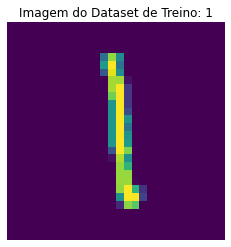

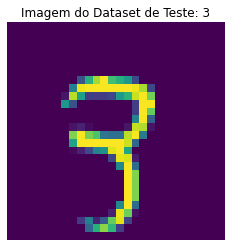

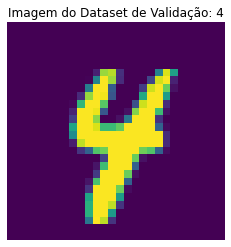

In [ ]:
'''
Plota uma imagem aleatória de cada um dos datasets e mostra a sua label
'''
cont = 0
for img, label in  loader_train:
  fig_treino = rd.randint(0, batch_size) #Escolhe um número aleatório para a figura que será mostrada
  cont += 1
  plt.figure() #Cria uma nova imagem
  plt.title('Imagem do Dataset de Treino: {}'.format(label[fig_treino])) #Título da imagem contendo a sua label
  plt.axis('off') #Esconde os eixos do plano cartesiano
  plt.imshow(img[fig_treino,:,:].squeeze()) # Plota a imagem selecionada aleatoriamente do dataset de treinamento
  if cont == 1:
    #Mostra apenas uma imagem do dataset de treinamento
    break

cont = 0
for img, label in  loader_test:
  cont += 1
  fig_teste = rd.randint(0, batch_size) #Escolhe um número aleatório para a figura que será mostrada
  plt.figure() #Cria uma nova imagem
  plt.title('Imagem do Dataset de Teste: {}'.format(label[fig_teste])) #Título da imagem contendo a sua label
  plt.axis('off') #Esconde os eixos do plano cartesiano
  plt.imshow(img[fig_teste,:,:].squeeze()) # Plota a imagem selecionada aleatoriamente do dataset de teste
  if cont == 1:
    #Mostra apenas uma imagem do dataset de teste
    break

cont = 0
for img, label in  loader_valid:
  cont += 1
  fig_valid = rd.randint(0, batch_size) #Escolhe um número aleatório para a figura que será mostrada
  plt.figure() #Cria uma nova imagem
  plt.title('Imagem do Dataset de Validação: {}'.format(label[fig_valid])) #Título da imagem contendo a sua label
  plt.axis('off') #Esconde os eixos do plano cartesiano
  plt.imshow(img[fig_valid,:,:].squeeze()) # Plota a imagem selecionada aleatoriamente do dataset de validação
  if cont == 1:
    #Mostra apenas uma imagem do dataset de validação
    break


##**3. Funções de ativação** <a class="anchor" name="section_3"></a>

As funções de ativação são uma parte crítica do design de redes neurais. Elas são responsáveis por definir como a soma ponderada de um input é transformada no output de um nó em uma camada da rede.

Como visto anteriormente, uma rede neural é composta por camadas de nós e aprende a mapear exemplos de inputs em outputs. Uma rede pode ter três tipos de camadas: camada de input, que recebe os inputs brutos; camadas escondidas ou hidden layers, que recebem inputs da camada anterior e passam um output para a camada seguinte; e a camada de output, que faz uma predição.

Para cada nó, os inputs são multiplicados pelos pesos do nó e, por fim, somados. O valor desse somatório é conhecido como “somatório de ativação” do nó. Em seguida, o somatório de ativação é transformado através de uma **função de ativação**, que define um output específico para aquele nó.

A escolha da função de ativação nas camadas escondidas (hidden layers) controlam o nível de aprendizagem de um modelo em relação ao dataset, ao passo que a escolha da função de ativação da camada de output vai definir o tipo de predição que o modelo pode fazer.

Todas as camadas escondidas utilizam a mesma função de ativação. Já a camada de output geralmente utiliza uma função de ativação diferente da função utilizada nas camadas escondidas, dependendo do tipo de predição que o modelo requer.

Outra característica das funções de ativação é que elas são diferenciáveis, ou seja, é possível calcular a derivada de primeira ordem dessas funções. Essa característica é importante já que boa parte das redes é treinada com algoritmos de backpropagation, que utilizam a derivada dos valores para atualizar os pesos do modelo.

Nesta parta do livro, vamos citar as principais funções de ativação e entender qual o melhor momento para utilizar cada uma delas.


###**3.1 Funções de ativação para hidden layers** <a class="anchor" name="section_3.1"></a>

Existem várias funções de ativação que podem ser utilizadas em redes neurais, porém só uma pequena parcela é utilizada na prática.

O tipo mais simples de função de ativação é a ativação linear, onde nenhuma transformação é aplicada. Uma rede que utiliza esse tipo de função é muito fácil de ser treinada, porém não consegue aprender estruturas mais complexas. 

As funções não lineares são preferidas pois permitem que os nós aprendam estruturas mais complexas nos dados. Tradicionalmente, as duas funções não lineares mais usadas nas camadas escondidas são a **sigmoide** e a **tangente hiperbólica**, também chamada de tanh.

####**3.1.1 Função sigmoide para hidden layers** <a class="anchor" name="section_3.1.1"></a>

A função de ativação sigmoide também é chamada de função logística. É a mesma função utilizada em algoritmos de regressão logística para classificação.

Essa função recebe qualquer valor real como input e retorna como output um valor no intervalo de 0 à 1. Quanto maior for o valor de input, o output fica mais próximo de 1, da mesma forma que quanto menor for o valor de input, o output fica mais próximo de 0.

A função é calculada pela equação 1 / (1 + e-x) e tem um formato de “S”.

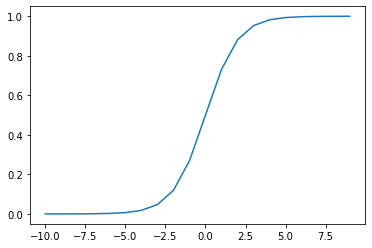

In [ ]:
from math import exp
from matplotlib import pyplot

#função de ativação sigmoide
def sigmoid(x):
  return 1.0/(1.0 + exp(-x))

#definindo dados de input
inputs = [x for x in range(-10, 10)]

#calculando outputs
outputs = [sigmoid(x) for x in inputs]

#plotando gráfico de inputs vs outputs
pyplot.plot(inputs, outputs)
pyplot.show()

Quando utilizamos a função sigmoide para as camadas escondidas, é uma boa prática usar a inicialização de pesos [Xavier Normal](https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79) e escalar os dados de input para o intervalo entre 0 e 1 antes do treinamento.


####**3.1.2 Função tanh para hidden layers** <a class="anchor" name="section_3.1.2"></a>

A função tanh é muito parecida com a função sigmoide e tem o mesmo formato de “S”. Essa função recebe qualquer valor real como input e retorna como output um valor entre -1 e 1. Quanto maior (mais positivo) for o valor de input, o output fica mais próximo de 1, da mesma forma que quanto menor (mais negativo) for o valor de input, o output fica mais próximo de -1.

A função tanh é calculada pela equação (e<sup>x</sup> - e<sup>-x</sup>) / (e<sup>x</sup> + e<sup>-x</sup>)

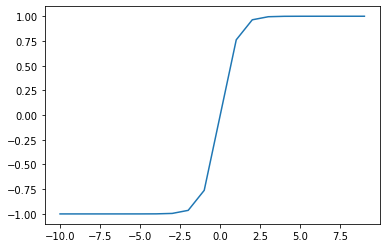

In [ ]:
from math import exp
from matplotlib import pyplot

#função de ativação tanh
def tanh(x):
  return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

#definindo dados de input
inputs = [x for x in range(-10, 10)]

#calculando outputs
outputs = [tanh(x) for x in inputs]

#plotando gráfico de inputs vs outputs
pyplot.plot(inputs, outputs)
pyplot.show()

Assim como na utilização da função sigmoide, quando utilizamos a função tanh para as camadas escondidas é uma boa prática usar a inicialização de pesos [Xavier Normal](https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79) e escalar os dados de input para o intervalo entre -1 e 1 antes do treinamento.

####**3.1.3 Limitações das funções sigmoide e tanh** <a class="anchor" name="section_3.1.3"></a>

**Vanishing Gradients**

O grande problema das funções sigmoide e tanh é que elas saturam. Isso significa que valores muito altos são ajustados para 1.0, e valores muito baixos são ajustados para 0 ou -1 no caso da sigmoide e tanh, respectivamente. Além disso, essas funções só são realmente sensíveis a mudanças que estejam por volta de seus valores médios, que são 0.5 para a sigmoide e 0.0 para a tanh. 

Ao utilizar essas funções no treinamento de redes com muitas camadas (ou deep neural networks) o gradiente diminui drásticamente ao passo que ele é propagado de volta na rede durante o backpropagation. O erro pode se tornar tão pequeno ao alcançar as camadas próximas à camada de input do modelo que seu efeito se torna praticamente desprezável, causando o "desligamento" de alguns nós.

Essa limitação na sensibilidade e saturação das funções acontece independentemente se somatório de ativação do nó fornecido como input contém informações relevantes ou não. Dessa forma, podemos acabar desligando alguns nós de grande relevância para o aprendizado da rede. Ou seja, uma vez que se torna saturado, o algoritmo de aprendizado fica com muita dificuldade em adaptar os pesos para melhorar a performance do modelo.

"*Vanishin gradients torna difícil saber para qual direção os parâmetros deveriam se mover para melhorar a função de custo*"

- [Deep Learning](https://www.amazon.com.br/Learning-Adaptive-Computation-Machine-English-ebook/dp/B08FH8Y533/ref=sr_1_2?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=2F1F0PQ7HO720&dchild=1&keywords=deep+learning&qid=1626780688&sprefix=deep+lear%2Caps%2C293&sr=8-2), 2016.


**<h4>Custo computacional</h4>**

Um outro problema da utilização das funções exponenciais como a sigmoide e a tanh é que, para redes muito profundas, o custo computacional ainda é muito alto, mesmo com os grandes avanços nas capacidades de hardware com as GPUs. Em outras palavras, uma rede neural profunda não pode ser facilmente treinada com o uso de funções mais complexas.

####**3.1.4 Função de ativação linear retificada (ReLU) para hidden layers** <a class="anchor" name="section_3.1.4"></a>

Para que possamos usar o gradient descent com o backpropagation dos erros para treinar redes neurais profundas, é necessário uma função de ativação que se comporte como uma função linear, mas é, de fato, uma função não-linear que permita que o modelo aprenda relacionamentos complexos sobre os dados de input.

Essa função também precisa prover uma maior sensibilidade aos somatórios de ativação que recebe como input e deve evitar a saturação.

A solução é utilizar a **função linear retificada**, ou ReL (rectified linear). Um nó ou uma unidade que implementa essa função de ativação é chamado de unidade de ativação linear retificada, ou **ReLU** (rectified linear activation unit). Frequentemente, as redes que usam essa função para suas camadas escondidas são chamadas de redes retificadas (rectified networks).

A adoção da ReLU pode facilmente ser considerada um marco na revolução do deep learning, por ser a técnica que permite o desenvolvimento rotineiro de redes neurais muito profundas.

A função ReL é um cálculo simples que retorna diretamente o valor de input sem nenhuma alteração, ou retorna 0.0 (zero) se o input é menor ou igual a 0.0 (zero).

Podemos descrevê-la por meio de um simples if-statement:

In [ ]:
if input > 0:
  return input
else:
  return 0

SyntaxError: ignored

Também podemos descrevê-la utilizando a função max() sob o conjunto de zero e o input z. Por exemplo:

In [ ]:
g(z) = max{0,z}

Podemos visualizar o formato da função ReLU abaixo:

In [ ]:
from matplotlib import pyplot

def rectified(x):
  return max(0.0, x)

inputs = [x for x in range(-10,10)]
outputs = [rectified(x) for x in inputs]

pyplot.plot(inputs, outputs)
pyplot.show()

Quando utilizamos a função ReLU para as camadas escondidas, é uma boa prática usar a inicialização de pesos [He Normal](https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/) e escalar os inputs para o intervalo entre 0 e 1 (normalizar) antes do treinamento.

Ou seja, a função ReL é linear para valores maiores que zero, contendo várias propriedades desejáveis de uma função de ativação linear para o treinamento de redes neurais usando o backpropagation. Mas, ao mesmo tempo, é uma função não-linear porque todos os valores negativos sempre retornam zero.

###**3.2 Dicas para a utilização da ReLU em CNNs** <a class="anchor" name="section_3.2"></a>

####**3.2.1 Use a ReLU como a função de ativação padrão** <a class="anchor" name="section_3.2.1"></a>

Por muito tempo a função de ativação mais utilizada nos hidden layers foi a função sigmoide. Depois, a função tanh tornou a sigmoide obsoleta e ocupou a posição de função mais utilizada. 

"*...a função de ativação tangente hiperbólica tipicamente performa melhor do que a sigmoide logística.*"
- [Deep Learning](https://www.amazon.com.br/Learning-Adaptive-Computation-Machine-English-ebook/dp/B08FH8Y533/ref=sr_1_2?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=2F1F0PQ7HO720&dchild=1&keywords=deep+learning&qid=1626780688&sprefix=deep+lear%2Caps%2C293&sr=8-2), 2016.

Mas, mesmo sendo superior à função sigmoide, a função tanh ainda sofre de vários dos mesmos problemas de sua antecessora, como vimos na seção sobre as limitações dessas funções.

As redes neurais mais modernas utilizam a ReLU como função de ativação.

####**3.2.2 Teste um valor baixo para o viés (bias) no input**<a class="anchor" name="section_3.2.2"></a>

O viés é o input no nó que possui um valor fixo. Ele tem o efeito de "mudar" a função de ativação e, tradicionalmente, é atribuído o valor 1 ao viés de input.

Quando você for usar ReLU na sua rede, considere atribuir valores menores para o viés, como 0.1. 

"*… it can be a good practice to set all elements of [the bias] to a small, positive value, such as 0.1. This makes it very likely that the rectified linear units will be initially active for most inputs in the training set and allow the derivatives to pass through.*"

Ainda existem discussões sobre este assunto. De toda forma, teste o desempenho de sua rede com diferentes valores para o viés de input.

####**3.2.3 Use a inicialização de pesos *He Initialization** <a class="anchor" name="section_3.2.3"></a>

Antes de trinar uma rede neural, os pesos da rede devem ser inicializados com valores randômicos pequenos. 

Se usarmos a ReLU em nossa rede e inicializarmos os pesos com valores pequenos centrados em zero, então por volta de metade dos nós da rede terão um output de zero.

Em 2015, Kaiming He publicou o artigo "[*Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification*](https://arxiv.org/abs/1502.01852)" sugerindo uma modificação na bastante conhecida [*Xavier Initialization*](http://proceedings.mlr.press/v9/glorot10a.html) para torná-la adequada ao uso com a ReLU, e desde então considera-se uma boa prática o uso dessa inicialização de pesos.

Para mais informações sobre as inicializações de peso, [clique aqui](https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/).

####**3.2.4 Escale os dados de input** <a class="anchor" name="section_3.2.4"></a>

Outra boa prática é escalar os dados antes de usar uma rede neural. Isso pode envolver a normalização das variáveis para um valor médio de zero e uma unidade de variância ou a normalização de cada valor para a escala de 0 à 1. 

Sem o escalamento dos dados, os pesos da rede neural podem crescer demais, tornando a rede instável e aumentando os erros de generalização.

####**3.2.5 Use penalidade de pesos** <a class="anchor" name="section_3.2.5"></a>

Por design, os outputs da ReLU serão sempre valores positivos. Isso significa que, em alguns casos, os outputs podem crescer continuamente em tamanho. Assim, pode ser uma boa ideia utilizar uma forma de regularização de pesos, como a [normalização de vetores L1 e L2](https://machinelearningmastery.com/vector-norms-machine-learning/).

###**3.3 Extensões e alternativas ao ReLU** <a class="anchor" name="section_3.3"></a>


####**3.3.1 Dying ReLU** <a class="anchor" name="section_3.3.1"></a>

A ReLU tem algumas limitações. Sua principal limitação é o caso onde grandes updates nos pesos fazem com que o somatório de ativação (z) seja sempre negativo, independentemente do input da rede.

Isso significa que um nó com esse problema sempre terá um output de 0, e este problema é conhecido como "dying ReLU".

A citação abaixo retirada do artigo [Rectifier Nonlinearities Improve Neural Network Acoustic Models](http://ai.stanford.edu/~amaas/papers/relu_hybrid_icml2013_final.pdf) explica resumidamente o problema.

"*the gradient is 0 whenever the unit is not active. This could lead to cases where a unit never activates as a gradient-based optimization algorithm will not adjust the weights of a unit that never activates initially. Further, like the vanishing gradients problem, we might expect learning to be slow when training ReL networks with constant 0 gradients.*"

Para lidar com este problema, existem algumas extensões da ReLU que "relaxam" a parte não-linear dos outputs para permitir pequenos valores negativos, ao invés de sempre atribuir 0.

####**3.3.2 Leaky ReLU** <a class="anchor" name="section_3.3.2"></a>

Uma dessas extensões é a função Leaky ReLU, que modifica a ReLU de modo a permitir pequenos valores negativos quando o input da função é menor que zero.

Assim como a ReLU, podemos descrevê-la com um simples if-statement:

In [ ]:
if input > 0:
  return input
else:
  return 0.01 * input

Também podemos descrevê-la utilizando a função max()

In [ ]:
g(z) = max{(0.01*z),z}

Podemos visualizar o formato da função **Leaky ReLU** abaixo:

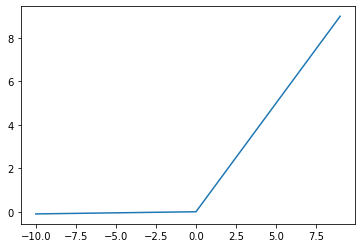

In [ ]:
from matplotlib import pyplot

def leaky_relu(x):
  return max(0.01 * x, x)

inputs = [x for x in range(-10,10)]
outputs = [leaky_relu(x) for x in inputs]

pyplot.plot(inputs, outputs)
pyplot.show()

####**3.3.3 ELU** <a class="anchor" name="section_3.3.3"></a>

A função ELU (Exponential Linear Unit) é uma generalização da ReLU que usa uma função exponencial parametrizada para transicionar entre os valores positivos e os pequenos valores negativos.

Podemos descrevê-la com o if-statement abaixo:

In [ ]:
if input > 0:
  return input
else:
  return alpha * (np.exp(input)-1)

Podemos visualizar o formato da função **ELU** abaixo:

In [ ]:
from matplotlib import pyplot
import numpy as np

def elu(alpha, x):
  if x > 0:
    return x
  else:
    return alpha * (np.exp(x)-1)

inputs = [x for x in range(-10,10)]
alpha = 1.0
outputs = [elu(alpha, x) for x in inputs]

pyplot.plot(inputs, outputs)
pyplot.show()

###**3.4 Ativação da camada de output** <a class="anchor" name="section_3.4"></a>

Todas as funções vistas até aqui tratavam exclusivamente das camadas escondidas. Agora, apresentaremos uma função para a camada de output, onde obtemos a previsão do modelo.

Existem várias funções que podem ser utilizadas na camada de output, como funções lineares, sigmoide, max, argmax, dentre outras. Porém iremos usar e explicar apenas a função **softmax**, por ser uma das mais utilizadas para problemas de classificação de imagens.

####**3.4.1 Função softmax** <a class="anchor" name="section_3.4.1"></a>

A softmax é uma função matemática que converte um vetor de números em um vetor de probabilidades. 

Nos problemas de classificação de imagens, a rede é configurada para ter um output de N valores, sendo um valor para cada classe possível (i.e. uma rede que classifica imagens de cães e gatos teria dois valores de output, pois existem duas classes). A função softmax é utilizada para normalizar esses valores de output, convertendo-os para N valores de probabilidade que, somados, resultam em 1.

Podemos descrevê-la por meio da função **e<sup>x</sup> / sum(e<sup>x</sup>)**

Não podemos plotar o gráfico dessa função, mas abaixo temos um exemplo ilustrativo:

In [ ]:
from numpy import exp
 
# softmax activation function
def softmax(x):
	return exp(x) / exp(x).sum()
 
# define input data
inputs = [1.0, 3.0, 2.0]
# calculate outputs
outputs = softmax(inputs)
# report the probabilities
print("Probabilidades:")
print(outputs)
# report the sum of the probabilities
print("\nSoma das probabilidades:")
print(outputs.sum())

##**4 Transfer Learning** <a class="anchor" name="section_4"></a>

####**4.1 Introdução** <a class="anchor" name="section_4.1"></a>

CNNs profundas podem levar dias ou até semanas para serem treinadas em grandes datasets. Uma forma de encurtar esse processo é reutilizando pesos de modelos que já foram treinados previamente em datasets padrões, como os datasets da [ImageNet](https://image-net.org/). 

Modelos com alto nível de performance podem ser baixados e utilizados diretamente ou integrados em um novo modelo para atender seu problema específico de visão computacional.

Em deep learning, transfer learning é a técnica na qual um modelo de rede neural é primeiro treinado em um problema similar ao problema que está sendo resolvido. Uma ou mais camadas do modelo treinado são então usadas em um novo modelo, que será treinado para o problema de interesse. Isso pode ser útil quando temos muito mais dados sobre o primeiro problema e a similaridade na estrutura do problema pode ser útil para os dois contextos.

A citação abaixo, do livro Deep Learning, contextualiza o conceito de transfer learning:

"*This is typically understood in a supervised learning context, where the input is the same but the target may be of a different nature. For example, we may learn about one set of visual categories, such as cats and dogs, in the first setting, then learn about a different set of visual categories, such as ants and wasps, in the second setting.*" - [Deep Learning](https://www.amazon.com.br/Deep-Learning-Ian-Goodfellow/dp/0262035618/ref=sr_1_1?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=deep+learning&qid=1627901051&sr=8-1&ufe=app_do%3Aamzn1.fos.25548f35-0de7-44b3-b28e-0f56f3f96147), 2016

####**4.2 Transfer Learning para reconhecimento de imagens** <a class="anchor" name="section_4.2"></a>

Uma gama de modelos de alta performance foram desenvolvidos para classificação de imagens e são publicados anualmente no ImageNet Large Scale Visual Recognition Challenge, ou ILSVRC.

Esses modelos podem ser usados para transfer learning em aplicações de visão computacional.

Algumas vantagens da utilização desses modelos são:


*   **Catacterísticas úteis aprendidadas:** os modelos aprenderam a identificar características genéricas em imagens, visto que eles foram treinados sob mais de um milhão de imagens para mais de mil categorias.
*   **Performance no estado da arte:** os modelos atingiram performances de altíssimo nível e permanecem efetivos no problema específico de reconhecimento de imagem para os quais eles foram desenvolvidos.
*   **Fácil acesso:** Os pesos dos modelos são fornecidos gratuitamente como arquivos para download e várias bibliotecas possuem APIs que tornam possível a importação desses pesos diretamente no modelo. 

Podemos fazer o download dos pesos desses modelos pré-treinados e usá-los em modelos de mesma arquitetura, usando várias bibliotecas diferentes de deep learning, como a Keras, TensorFlow e PyTorch.

####**4.3 Como usar modelos pré-treinados**  <a class="anchor" name="section_4.3"></a>

O uso de modelos pré-treinados são limitados apenas pela sua própria criatividade.

Por exemplo, podemos fazer o download de um modelo pré-treinado e utilizá-lo da forma que ele é, sem fazer alterações em sua arquitetura, para alguma aplicação de classificação de fotografias.

Também podemos utilizar um modelo pré-treinado para a extração de características (*feature extraction*). Nesse caso, pegamos o output da camada anterior à camada de output, e o usamos como input para um novo modelo classificador. Em outras palavras, utilizaremos o output da penúltima camada do modelo pré-treinado como input para um novo modelo.

Pode parecer um pouco confuso, mas lembre-se:
* As camadas convolucionais, próximas a camada de input, servem para aprender características de baixo nível sobre as imagens, como linhas, bordas, etc.;
* As camadas do meio aprendem características abstratas mais complexas, que combinam com as características de baixo nível; e
* As camadas mais próximas ao output servem para interpretar todas essas características extraídas até então e classificá-las no contexto do problema.

Tendo isso em mente, podemos escolher o nível de detalhamento que queremos usar de um modelo pré-treinado para a *feature extraction*. 

Por exemplo, se os objetos da nossa tarefa de classificação são muito diferentes dos objetos que o modelo pré-treinado sabe classificar, então pode ser mais apropriado usarmos apenas o output das camadas iniciais do modelo pré-treinado, já que estas extraem somente características de baixo nível. 

Da mesma forma, se os objetos da nossa tarefa de classificação são muito parecidos com os objetos que o modelo pré-treinado sabe classificar, então podemos usar o output de camadas mais profundas do modelo pré-treinado, ou até mesmo da camada *fully connected* (penúltima camada do modelo, anterior à camada de output), já que estas extraem características mais complexas.

O modelo pré-treinado pode ser usado como um programa à parte de *feature extraction*, no qual as imagens de input podem ser pré-processadas pelo modelo, ou porção do modelo resultando em um output (vetor de números), que pode então ser usado como input para treinar um novo modelo.

Uma outra alternativa é integrar o modelo pré-treinado ou uma porção do modelo pré-treinado diretamente em um novo modelo de rede neural. Nesse caso, os pesos do modelo pré-treinado podem ser congelados de forma que eles não passem por updates quando o novo modelo for treinado. 

Ou então, se permitirmos que os pesos sejam atualizados durante o treinamento do novo modelo, podemos atribuir um valor baixo para o *learning rate* e utilizar o modelo pré-treiando como um esquema de inicialização de pesos.

Resumindo, podemos utilizar os modelos pré-treinados das seguintes maneiras:
* **Classificador:** o modelo pré-treinado é utilizado diretamente para a classificação de imagens.
* **Extrator de características à parte:** o modelo pré-treinado, ou parte do modelo pré-treinado, é usado para pré-processar as imagens e extrair características relevantes.
* **Extrator de características integrado:** o modelo pré-treinado, ou parte do modelo pré-treinado, é integrado em um novo modelo, porém as camadas do modelo pré-treinado são congeladas durante o treinamento do novo modelo.
* **Inicializador de pesos:** o modelo pré-treinado, ou parte do modelo pré-treinado, é integrado em um novo modelo, e as camadas do modelo pré-treinado são treinadas novamente, junto ao novo modelo.

Cada uma dessas abordagens podem ser eficazes e nos salvar bastante tempo no desenvolvimento de CNNs.

No início pode não ser tão claro qual a melhor forma de usar os modelos pré-treinados no seu problema de visão computacional, então sinta-se à vontade para fazer algumas experimentações.

##**5. Problema prático** <a class="anchor" name="section_5"></a>



Demonstraremos os conceitos abordados neste módulo com um problema prático de classificação de imagens utilizando uma CNN. 

Utilizaremos um modelo pré-treinado (ResNet34) para classificar imagens de cães e gatos.

In [ ]:
import os

import numpy as np

from matplotlib import pyplot

%matplotlib inline

import torch
from torchvision import datasets
from torchvision import transforms, models
from torchvision.datasets import ImageFolder  
from torch.utils.data import DataLoader, random_split
from torch import nn
from torch import optim

import time
transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()]) # Definindo como as imagens serão transformadas para a entrada na CNN, em forma de tensores 224x224

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') #Permitindo acesso ao conteúdo do Drive

Mounted at /content/drive/


In [ ]:
data = ImageFolder('/content/drive/My Drive/IMLDL/Data', transform=transform) # Obtendo as imagens a partir do Drive e aplicando a transformação
print('Total de imagens no dataset:', len(data))

Total de imagens no dataset: 2412


In [ ]:
def testar_gpu():
	train_on_gpu = torch.cuda.is_available() 
	if train_on_gpu: 
		device = torch.device('cuda') 
		print("Treinando na GPU") 
	else: 
		device = torch.device('cpu') 
		print("GPU indisponível, treinando na CPU")
	return device

device = testar_gpu()

GPU indisponível, treinando na CPU


In [ ]:
print('Total de imagens no dataset:', len(data))
percentage = 60 
n_treino = round(len(data)* (percentage/100)) # Definindo a quantidade das imagens no DataSet que serão usadas para Treino

n_teste = round(len(data)* (100 - percentage)/(2*100)) # Definindo a quantidade das imagens no DataSet que serão usadas para Teste
n_valid = len(data) - n_treino - n_teste # Definindo a quantidade das imagens no DataSet que serão usadas para Validação

print('nº de imagens para treino: {:}'.format(n_treino) +'; nº de imagens para teste: {:}'.format(n_teste) +'; nº de imagens para validação: {:}'.format(n_valid) + '.')
data_train, data_test, data_valid = random_split(data, [n_treino, n_teste, n_valid]) #Aplicando a divisão de Dataset pegando as imagens de posições aleatórias no Dataset original

Total de imagens no dataset: 2412
nº de imagens para treino: 1447; nº de imagens para teste: 482; nº de imagens para validação: 483.


In [ ]:
batch_size = 100 #Definindo em quantos batches as entradas serão divididas 
loader_train, loader_test, loader_valid = DataLoader(data_train, batch_size=batch_size), DataLoader(data_test, batch_size=1), DataLoader(data_valid, batch_size=1)

In [ ]:
def importNN():

    """
    Importa uma rede neural pré-treinada (Resnet34) e faz as adequações 
    necessárias para adaptá-la ao problema proposto. 

    Retorna
    -------------
    model : torchvision.models.resnet.ResNet
        Variável que deve ser retornada com o modelo de rede pré-treinada 
        importado e adaptado ao problema.
    """

    model=0
    classifier = 0 

    model = models.resnet34(pretrained=True) # Importando uma rede neural pretreinada
  
    for param in model.parameters():
          param.requires_grad = False #Desativando a checagem dos gradiente para reduzir o custo computacional

          # Alterando a arquitetura da porção classificadora da CNN
          classifier = nn.Sequential(nn.Linear(512,256), # Definindo o número de entradas e de saídas da primera camada da porção classificadora da CNN
                                      nn.ReLU(), # Definindo a função de ativação
                                      nn.Dropout(p=0.2),
                                      nn.Linear(256,2), # Definindo o número de entradas e de saídas da última camada da porção classificadora da CNN
                                      nn.Softmax(dim=1)) #Aplicando a função de ativação Softmax na camada de output
    
    model.fc = classifier  

    return model

In [ ]:
model = importNN().to(device) 

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


In [ ]:
def define(model, lr):

    criterion = nn.NLLLoss() #Função de perda escolhida: NLLLoss (negative log likelihood loss)

    optimizer = torch.optim.SGD(model.fc.parameters(), lr=lr, momentum=0.9, weight_decay=0.005) #Parâmetros otimizadores escolhidos para o gradiente descendente: momentum de 0.9 e weight decay de 0.005

    return optimizer, criterion

In [ ]:
def train_test(model, loader_train, loader_test): #definindo função de treino

		"""
		Treina os parâmetros da(s) camada(s) "fully connected" da rede contida em 
		'model' com os exemplos contidos em 'data_train' (organizados por 
		'train_loader'). Em seguida, testa a acurácia e o erro de classificação da 
		rede com os exemplos contidos em 'data_test' (organizados por 
		'loader_test').
		
		Parâmetros
		-------------
		model : torchvision.models
        Variável que contém o modelo de rede pré-treinada importado e adaptado 
        ao problema.
    loader_train: torch.utils.data.dataloader.DataLoader
        Variável responsável por organizar e carregar os dados relacionados aos
        exemplos de treino ('data_train') conforme definimos anteriormente.
    loader_test: torch.utils.data.dataloader.DataLoader
        Variável responsável por organizar e carregar os dados relacionados aos
        exemplos de teste ('data_test') conforme definimos anteriormente.
    """

  train_loss,test_loss,acc =0,0,0 

  model.train()
  for imagem_treino,label_treino in loader_train:

    loss = 0
    imagem_treino, label_treino = imagem_treino.float().to(device), label_treino.to(device)
    outputs = model(imagem_treino)
    loss = criterion(outputs, label_treino.float().long())
    
    optimizer.zero_grad() #Zera o gradiente
    loss.backward() #Realiza o backpropagation
    optimizer.step() #Dá mais um passo dentro do gradiente
    train_loss += loss
	
  train_loss = train_loss/len(loader_train)

  model.eval()
  correct = 0
  total = 0
  test_loss = 0
	
  with torch.no_grad():
	  for imagem_teste, label_teste in loader_test:

		  imagem_teste, label_teste = imagem_teste.float().to(device), label_teste.to(device)
		  outputs_test = model(imagem_teste)
	 
		  _,previsao = torch.max(outputs_test, dim = 1)
		  test_loss += criterion(outputs_test, label_teste.long())
		  total = total + 1
			
		  if previsao == label_teste: 
		    correct = correct + 1
		
	  test_loss = test_loss/len(loader_test)

	  acc = (correct/total)*100
	 

  return train_loss, test_loss, acc

In [ ]:
START = time.time()

list_train_loss = []
list_test_loss = []
list_acc = []
time1epoch = 0

lr = 0.005 #Definindo o learning rate
epochs = 10 #Definindo a quantidade de epochs
optimizer, criterion = define(model, lr)

for epoch in range(1, epochs+1):
  start = time.time()
  train_loss, test_loss, acc = train_test(model, loader_train, loader_test)
  end = time.time()

  list_train_loss.append(train_loss), list_test_loss.append(test_loss), list_acc.append(acc)

  Time = end - start
  if epoch == 1:
    time1epoch = Time

  if epoch < 10:
    print('Epoch: ', epoch ,' perda: {:.4f}'.format(test_loss.item()), ' Acurácia: {:.2f}'.format(acc), ' Tempo utilizado nesta epoch: {:.2f}'.format(Time), 'segundos.')
  else:
    print('Epoch:', epoch ,' perda: {:.4f}'.format(test_loss.item()), ' Acurácia: {:.2f}'.format(acc), ' Tempo utilizado nesta epoch: {:.2f}'.format(Time), 'segundos.')
END = time.time()

print()
TIME = (END - START) - time1epoch
print('\n Tempo usado para o treino, excluindo a primeira epoch: {:.2f}'.format(TIME), 'segundos.')		

Epoch:  1  perda: -0.7778  Acurácia: 95.23  Tempo utilizado nesta epoch: 589.36 segundos.
Epoch:  2  perda: -0.9219  Acurácia: 97.51  Tempo utilizado nesta epoch: 290.60 segundos.
Epoch:  3  perda: -0.9578  Acurácia: 98.55  Tempo utilizado nesta epoch: 292.47 segundos.
Epoch:  4  perda: -0.9711  Acurácia: 98.96  Tempo utilizado nesta epoch: 289.34 segundos.
Epoch:  5  perda: -0.9768  Acurácia: 99.17  Tempo utilizado nesta epoch: 290.42 segundos.
Epoch:  6  perda: -0.9795  Acurácia: 99.38  Tempo utilizado nesta epoch: 291.27 segundos.
Epoch:  7  perda: -0.9812  Acurácia: 99.38  Tempo utilizado nesta epoch: 290.36 segundos.
Epoch:  8  perda: -0.9833  Acurácia: 99.38  Tempo utilizado nesta epoch: 290.14 segundos.
Epoch:  9  perda: -0.9840  Acurácia: 99.38  Tempo utilizado nesta epoch: 289.23 segundos.
Epoch: 10  perda: -0.9850  Acurácia: 99.38  Tempo utilizado nesta epoch: 289.50 segundos.


 Tempo usado para o treino, excluindo a primeira epoch: 2613.34 segundos.


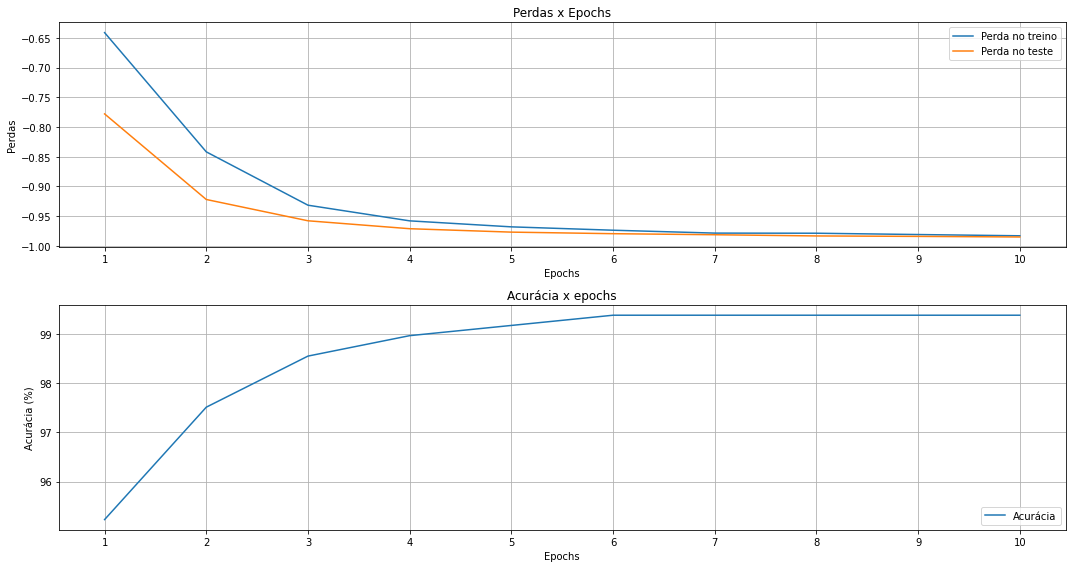

In [ ]:
fig, axs = pyplot.subplots(2, figsize=(15,8))
axs[0].plot(range(1, epochs+1), list_train_loss,label="Perda no treino") 
axs[0].plot(range(1, epochs+1), list_test_loss, label="Perda no teste")
axs[0].set(xticks=range(1, epochs+1))
axs[0].set_title('Perdas x Epochs') 
axs[0].set(xlabel='Epochs') 
axs[0].set(ylabel='Perdas') 
axs[0].legend() 
axs[0].grid(True) 

axs[1].plot(range(1, epochs+1), list_acc, label='Acurácia') 
axs[1].set(xticks=range(1, epochs+1))
axs[1].set_title('Acurácia x epochs') 
axs[1].set(xlabel='Epochs') 
axs[1].set(ylabel='Acurácia (%)') 
axs[1].legend(loc='lower right')
axs[1].grid(True) 

pyplot.tight_layout()

In [ ]:
total = 0
correct = 0
loss_valid = 0

for imagem_valid, label_valid in loader_valid:

	loss_v = 0

	imagem_valid, label_valid = imagem_valid.float().to(device), label_valid.to(device)
	outputs_valid = model(imagem_valid)
	_, previsao = torch.max(outputs_valid, dim = 1)
	loss_v = criterion (outputs_valid, label_valid.long())
	total = total + 1 
	if previsao == label_valid: 
		correct = correct + 1 
	loss_valid += loss_v

loss_valid = loss_valid/len(loader_valid)
accuracy = (correct/total)*100 

print('A acurácia obtida foi de: {:.2f}'.format(accuracy) + '%.')
print()
print('O erro médio obtido foi de: {:.4f}'.format(loss_valid))
print()
print('O tempo gasto durante o treinamento, excluindo a primeira época, foi de: {:.2f}'.format(TIME), 'segundos.')
print()

A acurácia obtida foi de: 99.59%.

O erro médio obtido foi de: -0.9872

O tempo gasto durante o treinamento, excluindo a primeira época, foi de: 2613.34 segundos.



##**6. Sugestões** <a class="anchor" name="section_6"></a>



1. Altere a arquitetura da rede pré-treinada e compare os resultados. 
2. Altere a função de ativação das camadas escondidas.
3. Altere os parâmetros (learning rate, quantidade de epochs, função de perda). 




##**7. Referências Bibliográficas** <a class="anchor" name="section_7"></a>

- [Medium.com](https://medium.com/analytics-vidhya/your-handbook-to-convolutional-neural-networks-628782b68f7e)
- [towardsdatascience.com (1)](https://towardsdatascience.com/understanding-cnn-convolutional-neural-network-69fd626ee7d4)
- [towardsdatascience.com (2)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)
- [deeplizard](https://www.youtube.com/watch?v=YRhxdVk_sIs)
- [ashokrahulgade.com](http://www.ashokrahulgade.com/skills/DL/CNN/Introduction.html)
- [A Gentle Introduction to the Rectified Linear Unit (ReLU) ](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)
- [How to Choose an Activation Function for Deep Learning](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/)
- [Rectifier Nonlinearities Improve Neural Network Acoustic Models](http://ai.stanford.edu/~amaas/papers/relu_hybrid_icml2013_final.pdf)
- [How to Fix the Vanishing Gradients Problem Using the ReLU](https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/)
- [Transfer Learning in Keras with Computer Vision Models](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/)
- [Deep Learning](https://www.amazon.com.br/Deep-Learning-Ian-Goodfellow/dp/0262035618/ref=sr_1_1?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=deep+learning&qid=1628516539&sr=8-1&ufe=app_do%3Aamzn1.fos.25548f35-0de7-44b3-b28e-0f56f3f96147)
